# Trabalho 3

------------------------

## Bibliotecas

In [216]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema

In [217]:
def resolver_difusao(t_total, n, L, alpha, dt, T_A, q_L, T_inicial):
    """
    Resolve a equação de difusão de calor 1D (EDP parabólica) usando o método
    de diferenças finitas totalmente implícito.
    """
    
    # 1. Discretização
    dx = L / (n - 1)
    Nt = int(t_total / dt)
    
    # 2. Inicialização da Matriz A
    A = np.zeros((n, n))
    
    # 3. Preenchimento da Matriz A (nós internos)
    # (-alpha/dx^2)T_{i-1}^{k+1} + (1/dt + 2*alpha/dx^2)T_i^{k+1} + (-alpha/dx^2)T_{i+1}^{k+1} = T_i^k / dt
    for i in range(1, n - 1):
        A[i, i-1] = -alpha / dx**2
        A[i, i]   = 1 / dt + 2 * alpha / dx**2
        A[i, i+1] = -alpha / dx**2

    # 4. Condições de Contorno na Matriz A
    A[0, 0] = 1.0     # Dirichlet em x=0
    A[n-1, n-1] = 1.0 # Neumann em x=L (dT/dx = q_L)
    A[n-1, n-2] = -1.0

    # 5. Condição Inicial
    T = np.full(n, T_inicial)
    
    # 6. Armazenamento (Apenas o último passo é necessário para este estudo)
    # Loop no Tempo
    for k in range(Nt):
        b = T / dt
        b[0] = T_A
        b[n-1] = q_L * dx
        
        T = np.linalg.solve(A, b)

    # 7. Cria o vetor de posições x
    x = np.linspace(0, L, n)
    
    # Retorna o último perfil de T e o vetor x
    return T, x

## Parâmetros para a solução

In [218]:
L = 1.0          # Comprimento da barra (m) 
alpha = 1.0e-4   # Coef. de difusão térmica (m^2/s) 
n = 51           # Número de nós 
dt = 10.0        # Passo no tempo (s) 
t_total = 500.0  # Tempo total de simulação (s) 
T_inicial = 20.0 # Temperatura inicial (°C) 
T_A = 100.0      # Temp. em x=0 (°C) (Dirichlet) 
q_L = 0.0        # Fluxo em x=L (Neumann - isolado)

## Obtém a solução e o domnínio

In [219]:
T, x = resolver_difusao(t_total, n, L, alpha, dt, T_A, q_L, T_inicial)

T

array([100.        ,  95.93449028,  91.8857277 ,  87.87024811,
        83.90416929,  80.0029931 ,  76.18142077,  72.45318488,
        68.83090144,  65.32594463,  61.94834609,  58.70672026,
        55.60821612,  52.6584954 ,  49.86173633,  47.22066161,
        44.73658872,  42.40950011,  40.2381306 ,  38.22006906,
        36.35187122,  34.62918048,  33.04685373,  31.59908905,
        30.27955275,  29.08150321,  27.99790941,  27.02156225,
        26.14517744,  25.36148871,  24.66333071,  24.04371119,
        23.49587251,  23.01334246,  22.58997507,  22.21998192,
        21.89795473,  21.61888023,  21.37814813,  21.17155344,
        20.99529388,  20.84596372,  20.7205447 ,  20.61639526,
        20.53123861,  20.46315073,  20.41054875,  20.37218033,
        20.34711466,  20.33473531,  20.33473531])

## Plota o resultado obtido

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\1139952909.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Evolução da Temperatura na Barra (Método Implícito)\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')


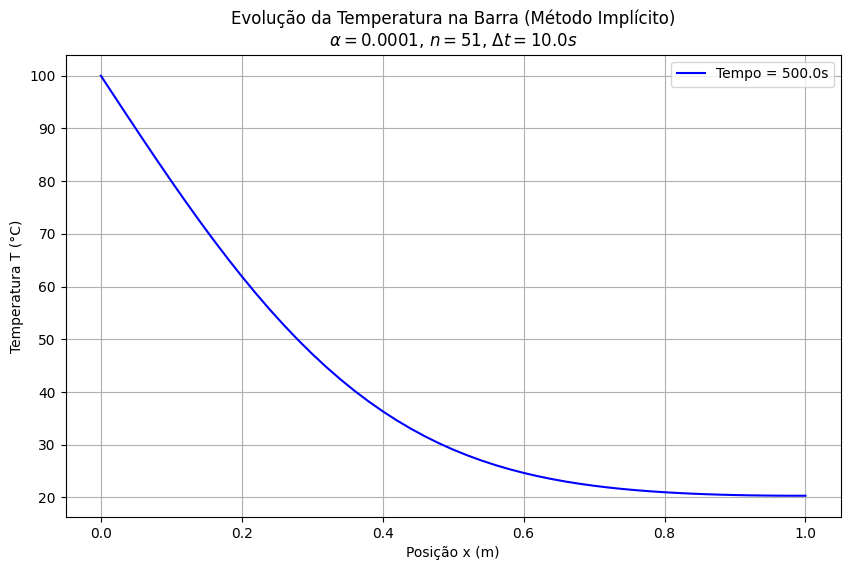

In [220]:
# 3. Plotar os resultados em instantes específicos
plt.figure(figsize=(10, 6))

plt.plot(x, T, label=f'Tempo = {t_total}s', color='blue')

plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Temperatura na Barra (Método Implícito)\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')
plt.grid(True)
plt.legend()
plt.savefig('grafico_evolucao_temperatura.png')
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\3245570474.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Evolução da Temperatura na Barra para diferentes tempos\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')


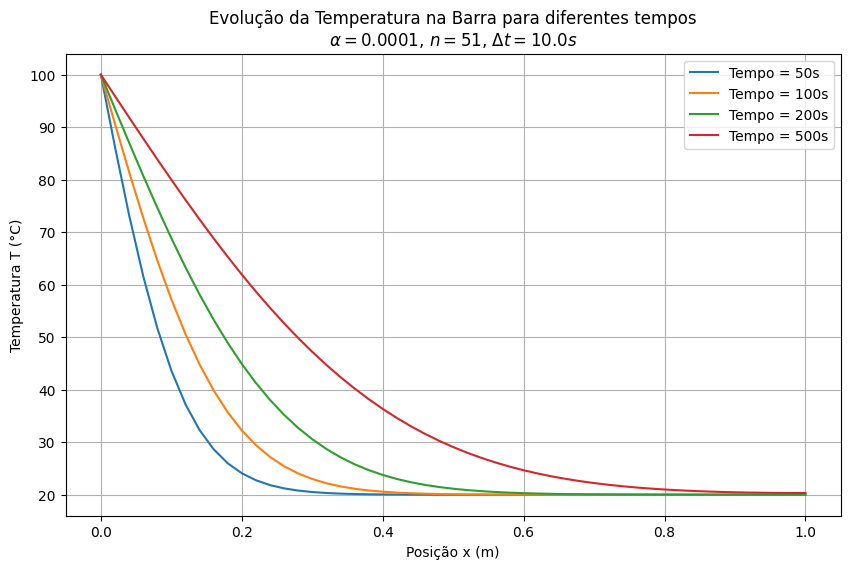

In [221]:
# Tempos que queremos plotar (em segundos)
tempos_para_plotar = [50, 100, 200, 500]

# Executa a solução para cada tempo requisitado e armazena (T, x)
resultados = [resolver_difusao(t, n, L, alpha, dt, T_A, q_L, T_inicial) for t in tempos_para_plotar]
T_historico = [res[0] for res in resultados]
x = resultados[0][1]  # mesmas posições x para todas as soluções

plt.figure(figsize=(10, 6))
for idx, t_plot in enumerate(tempos_para_plotar):
    plt.plot(x, T_historico[idx], label=f'Tempo = {t_plot}s')

plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Temperatura na Barra para diferentes tempos\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')
plt.grid(True)
plt.legend()
plt.savefig('grafico_evolucao_temperatura_tempos.png')
plt.show()

In [222]:
L = 1.0
alpha = 1.0e-4
t_total = 500.0
T_inicial = 20.0
T_A = 100.0
q_L = 0.0

# Ponto de análise: meio da barra (x=L/2) no tempo final (t=500s)
ponto_analise_idx_percent = 0.5 

In [223]:
# Parâmetros fixos para este estudo
dt_fixo = 10.0

# Geração da solução de referência (malha muito fina)
n_ref_dx = 501
T_ref_dx, x_ref_dx = resolver_difusao(t_total, n_ref_dx, L, alpha, dt_fixo, T_A, q_L, T_inicial)
idx_ref_dx = int(len(x_ref_dx) * ponto_analise_idx_percent)
T_referencia_dx = T_ref_dx[idx_ref_dx]

# Valores de 'n' para testar
n_valores = [11, 21, 31, 51, 81, 101, 151, 201]
dx_valores = []
erros_dx = []

print("Iniciando Estudo de Convergência de Malha (dx)...")
for n_teste in n_valores:
    dx = L / (n_teste - 1)
    T_teste, x_teste = resolver_difusao(t_total, n_teste, L, alpha, dt_fixo, T_A, q_L, T_inicial)
    
    # Ponto correspondente na malha de teste
    idx_teste = int(len(x_teste) * ponto_analise_idx_percent)
    
    erro = np.abs(T_teste[idx_teste] - T_referencia_dx)
    
    dx_valores.append(dx)
    erros_dx.append(erro)
    print(f"  n={n_teste:3d} (dx={dx:.4f}): Erro = {erro:.6f} °C")

Iniciando Estudo de Convergência de Malha (dx)...
  n= 11 (dx=0.1000): Erro = 0.193708 °C
  n= 21 (dx=0.0500): Erro = 0.047420 °C
  n= 31 (dx=0.0333): Erro = 0.020990 °C
  n= 51 (dx=0.0200): Erro = 0.007526 °C
  n= 81 (dx=0.0125): Erro = 0.002911 °C
  n=101 (dx=0.0100): Erro = 0.001842 °C
  n=151 (dx=0.0067): Erro = 0.000783 °C
  n=201 (dx=0.0050): Erro = 0.000410 °C


In [224]:
# Parâmetros fixos para este estudo
n_fixo = 51 # n=51 do exemplo

# Geração da solução de referência (passo de tempo muito pequeno)
dt_ref_dt = 0.5
T_ref_dt, x_ref_dt = resolver_difusao(t_total, n_fixo, L, alpha, dt_ref_dt, T_A, q_L, T_inicial)
idx_ref_dt = int(len(x_ref_dt) * ponto_analise_idx_percent)
T_referencia_dt = T_ref_dt[idx_ref_dt]

# Valores de 'dt' para testar
dt_valores = [20.0, 10.0, 5.0, 2.5, 1.25, 1.0, 0.8]
erros_dt = []

print("\nIniciando Estudo de Convergência de Tempo (dt)...")
for dt_teste in dt_valores:
    T_teste, x_teste = resolver_difusao(t_total, n_fixo, L, alpha, dt_teste, T_A, q_L, T_inicial)
    
    # Ponto correspondente na malha de teste
    idx_teste = int(len(x_teste) * ponto_analise_idx_percent)
    
    erro = np.abs(T_teste[idx_teste] - T_referencia_dt)
    
    erros_dt.append(erro)
    print(f"  dt={dt_teste:5.2f} s: Erro = {erro:.6f} °C")


Iniciando Estudo de Convergência de Tempo (dt)...
  dt=20.00 s: Erro = 0.061912 °C
  dt=10.00 s: Erro = 0.031908 °C
  dt= 5.00 s: Erro = 0.015550 °C
  dt= 2.50 s: Erro = 0.007010 °C
  dt= 1.25 s: Erro = 0.002648 °C
  dt= 1.00 s: Erro = 0.001768 °C
  dt= 0.80 s: Erro = 0.001062 °C


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\597777873.py:7: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_xlabel('Passo de Espaço $\Delta x$ (m)')
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\597777873.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_ylabel('Erro Absoluto T ($^{\circ}C$)')
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\597777873.py:15: SyntaxWarning: invalid escape sequence '\D'
  ax2.set_xlabel('Passo de Tempo $\Delta t$ (s)')
C:\Users\vinic\AppData\Local\Temp\ipykernel_3088\597777873.py:16: SyntaxWarning: invalid escape sequence '\c'
  ax2.s

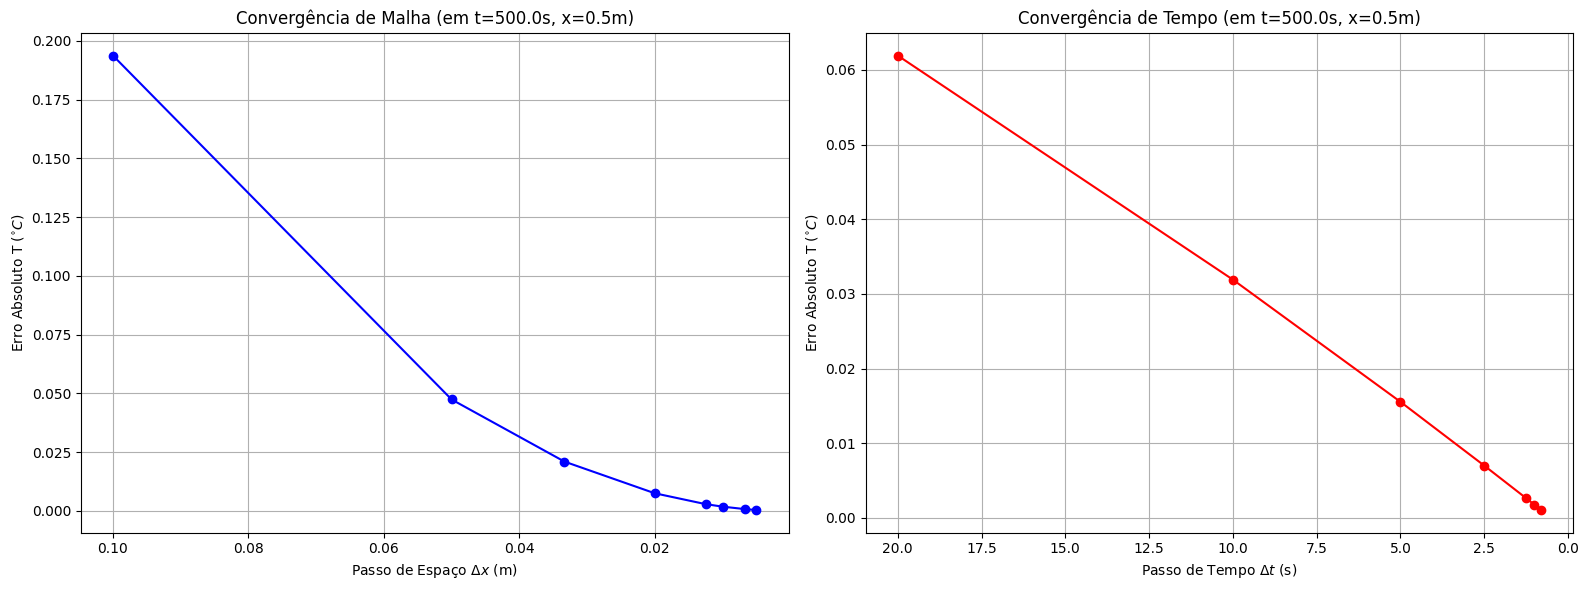

In [225]:
# Plotagem dos resultados de convergência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Convergência de Malha
ax1.plot(dx_valores, erros_dx, 'o-', color='b')
ax1.set_title(f'Convergência de Malha (em t={t_total}s, x={L*ponto_analise_idx_percent}m)')
ax1.set_xlabel('Passo de Espaço $\Delta x$ (m)')
ax1.set_ylabel('Erro Absoluto T ($^{\circ}C$)')
ax1.grid(True)
ax1.invert_xaxis() # Plota do dx maior para o menor

# Gráfico de Convergência de Tempo
ax2.plot(dt_valores, erros_dt, 'o-', color='r')
ax2.set_title(f'Convergência de Tempo (em t={t_total}s, x={L*ponto_analise_idx_percent}m)')
ax2.set_xlabel('Passo de Tempo $\Delta t$ (s)')
ax2.set_ylabel('Erro Absoluto T ($^{\circ}C$)')
ax2.grid(True)
ax2.invert_xaxis() # Plota do dt maior para o menor

plt.tight_layout()
plt.savefig('graficos_convergencia.png')
plt.show()